Predicting Tennis Player GOAT ranking with their current_rank, best_rank, turned_pro, seasons, elo_rank, best_elo_rank, peak_elo_rank, and number of titles.

Introduction + Methods:

The Tennis player stats data frame includes players stats including an index, a player's name, age, country, plays, wikipedia site, current_rank, best_rank, whether or not they play backhanded, their prize_money, their facebook handle, their	twitter handle, their nickname, their number of	grand_slams, davis_cups, team_cups, olympics, weeks_at_top, tour_finals, their	website, their height, their favorite surface type to play on, when they turned pro, their number of seasons, whether or not they're active, their current, best, and peak elo ranking, their last appearance, their GOAT rank, their number of titles, their best season, whether or not they're retired, their number of masters, their birthplace, residence, weight, coach. All of this data provides insight into a players' quality, style, and historical record.

The question we want to answer in this project are can we predict GOAT ranking with (1) a player's current_rank, (2) their best_rank, (3) whether or not they turned pro, (4) the number of seasons they've played, (5) their elo_rank, (6) their best_elo_rank, (7) their peak_elo_rank, and (7) the number of titles they have? We will use these variables to predict GOAT ranking. One way we will visualize the results is a line chart showing the impact of the number of neighbors of our accuracy estimate. Another way we will visualize the results is in a confusion matrix.

Expected outcomes and significance:

We expect to find that our predictors (1) current_rank, (2) best_rank, (3) turned_pro, (4) seasons, (5) elo_rank, (6) best_elo_rank, (7) peak_elo_rank, and (8) titles will have moderate strength in predicting a player's GOAT rank, with "titles" and "best_elo_rank" being especially good at predicting GOAT rank. The impact that this could have on findings is to show how each predictor or variable contributes to a player GOAT rank; a player that wants to improve their GOAT rank would presumably try to increase their titles and best_elo_rank. This could also lead to further questions into the effectiveness of GOAT rankings (which are a weighted average of various variables) in showing and determining player performance comparatively. Perhaps there are variables that should be weighted less in the GOAT rankings (whether or not past results matter as much as they should) to better demonstrate whether or not they are really the Greatest of All Time.

In [148]:
#Preliminary exploratory data analysis
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)

player_stats <- read_csv("data/player_stats.csv")

colnames(player_stats) <- c(X1 = "index",
                       Age = "age",
                       Country = "country",
                       Plays = "plays",
                       Wikipedia = "wiki",
                       "Current Rank" = "current_rank",
                       "Best Rank" = "best_rank",
                       Name = "name",
                       Backhand = "backhand",
                       "Prize Money" = "prize_money", 
                       Height = "height",
                       "Favorite Surface" = "fav_surface",
                       "Turned Pro" = "turned_pro",
                       Seasons = "seasons",
                       Active = "active",
                       "Current Elo Rank" = "elo_rank",
                       "Best Elo Rank" = "best_elo_rank",
                       "Peak Elo Rank" = "peak_elo_rank",
                       "Last Appearance" = "last_app",
                       Titles = "titles",
                       "GOAT Rank" = "goat_rank",
                       "Best Season" = "best_season",
                       Retired = "retired",
                       Masters = "masters",
                       Birthplace = "birthplace",
                       Residence = "res",
                       Weight = "weight",
                       Coach = "coach",
                       Facebook = "facebook",
                       Twitter = "twitter",
                       Nicknames = "nicknames",
                       "Grand Slams" = "grand_slams",
                       "Davis Cups" = "davis_cups",
                       "Web Site" = "website",
                       "Team Cups" = "team_cups",
                       Olympics = "olympics",
                       "Weeks at No. 1" = "weeks_at_top",
                       "Tour Finals" = "tour_finals")

tidy_player_stats <- player_stats %>%
    filter(active == "Yes") %>%
    filter(!is.na(goat_rank)) %>%
    select(current_rank, best_rank, turned_pro, seasons, elo_rank, best_elo_rank, peak_elo_rank, goat_rank, titles) %>%
    extract(col = current_rank, "current_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = best_rank, "best_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = elo_rank, "elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = best_elo_rank, "best_elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = peak_elo_rank, "peak_elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = goat_rank, "goat_rank" , remove = TRUE, convert = TRUE) %>%
    arrange(goat_rank)

head(tidy_player_stats)
tail(tidy_player_stats)

tidy_player_stats <- as_tibble(tidy_player_stats)

tidy_player_stats_split <- initial_split(tidy_player_stats, prop = 0.75, strata = goat_rank)
tidy_player_stats_training <- training(tidy_player_stats_split)
tidy_player_stats_testing <- testing(tidy_player_stats_split)

tidy_player_stats_training

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,1,1998,22,3,1,2550,1,103
2,1,2003,17,2,1,2629,2,77
1,1,2001,19,1,1,2552,3,84
128,1,2005,15,7,2,2500,12,46
121,3,2005,14,4,3,2329,33,22
15,3,2002,18,12,5,2291,36,16


current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
116,33,2003,13,141,62,1895,489,1
49,39,2008,10,62,45,1936,489,1
109,35,2009,7,94,38,1953,489,1
120,39,2006,9,89,45,1935,489,1
71,58,NA,7,44,43,1952,489,1
292,74,2008,7,143,57,1904,489,1


current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,1,1998,22,3,1,2550,1,103
2,1,2003,17,2,1,2629,2,77
1,1,2001,19,1,1,2552,3,84
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
109,35,2009,7,94,38,1953,489,1
120,39,2006,9,89,45,1935,489,1
71,58,NA,7,44,43,1952,489,1


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows conta

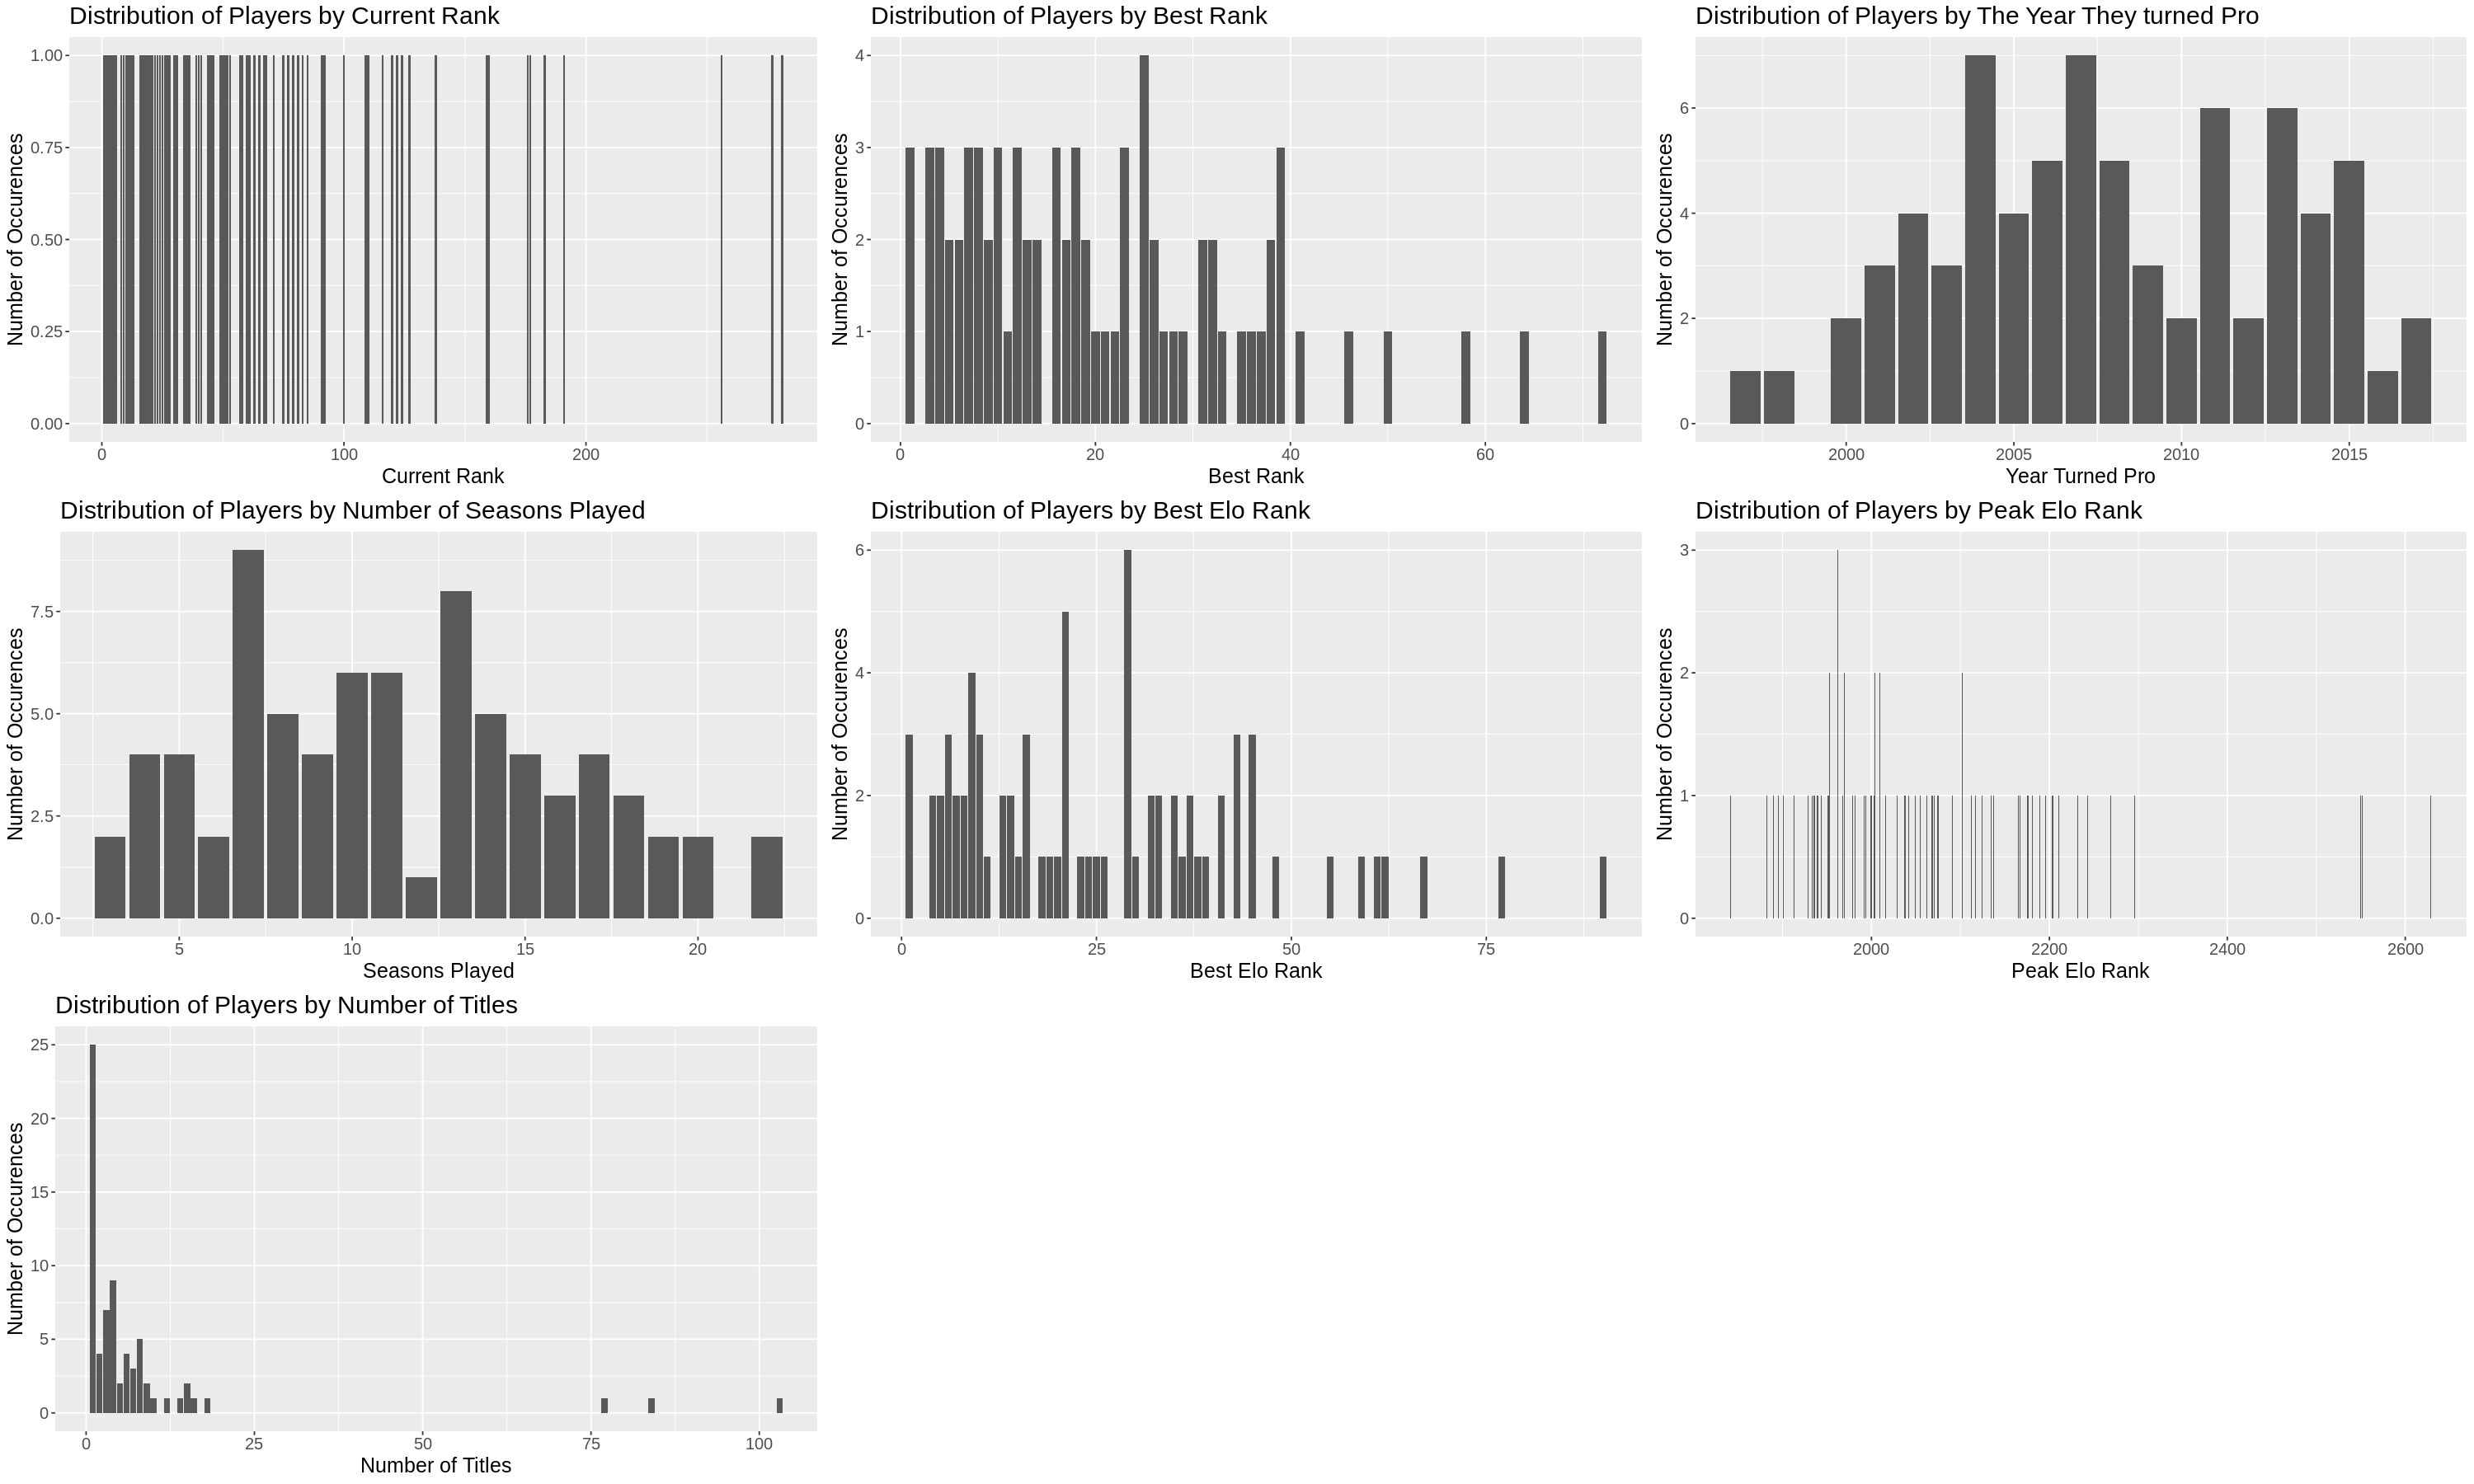

In [149]:
#Preliminary exploratory data analysis:
#-Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do 
#(this is exploratory data analysis). An example of a useful visualization could be one that compares the 
#distributions of each of the predictor variables you plan to use in your analysis.

#predictor variablesa
current_rank_distribution <- tidy_player_stats_training %>%
    group_by(current_rank) %>%
    summarize(n=n())
best_rank_distribution <- tidy_player_stats_training %>%
    group_by(best_rank) %>%
    summarize(n=n())
turned_pro_distribution <- tidy_player_stats_training %>%
    group_by(turned_pro) %>%
    summarize(n=n())
seasons_distribution <- tidy_player_stats_training %>%
    group_by(seasons) %>%
    summarize(n=n())
best_elo_rank_distribution <- tidy_player_stats_training %>%
    group_by(best_elo_rank) %>%
    summarize(n=n())
peak_elo_rank_distribution <- tidy_player_stats_training %>%
    group_by(peak_elo_rank) %>%
    summarize(n=n())
titles_distribution <- tidy_player_stats_training %>%
    group_by(titles) %>%
    summarize(n=n())

options(repr.plot.width = 8, repr.plot.height = 8)
#predictor variables
current_rank_plot <- current_rank_distribution %>%
    ggplot(aes(x = current_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Current Rank", x = "Current Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#current_rank_plot
best_rank_plot <- best_rank_distribution %>%
    ggplot(aes(x = best_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Best Rank", x = "Best Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#best_rank_plot
turned_pro_plot <- turned_pro_distribution %>%
    ggplot(aes(x = turned_pro, y = n)) +
    geom_bar(stat = "identity") +
    labs(title = "Distribution of Players by The Year They turned Pro", x = "Year Turned Pro", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#turned_pro_plot
seasons_plot <- seasons_distribution %>%
    ggplot(aes(x = seasons, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Number of Seasons Played", x = "Seasons Played", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#seasons_plot
best_elo_rank_plot <- best_elo_rank_distribution %>%
    ggplot(aes(x = best_elo_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Best Elo Rank", x = "Best Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#best_elo_rank_plot
peak_elo_rank_plot <- peak_elo_rank_distribution %>%
    ggplot(aes(x = peak_elo_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Peak Elo Rank", x = "Peak Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#peak_elo_rank_plot
titles_plot <- titles_distribution %>%
    ggplot(aes(x = titles, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Number of Titles", x = "Number of Titles", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#titles_plot

options(repr.plot.width = 25, repr.plot.height = 15)
grid.arrange(current_rank_plot, best_rank_plot, turned_pro_plot, seasons_plot, best_elo_rank_plot, peak_elo_rank_plot, titles_plot)